
Importing Libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# plt.style.use('fivethirtyeight')
# sns.set()

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD


SubTask1 Exploratory Data Analysis:

Loading Data


In [2]:
customers = pd.read_csv('./olist_customers_dataset.csv')
geolocation = pd.read_csv('./olist_geolocation_dataset.csv')
order_items = pd.read_csv('./olist_order_items_dataset.csv')
order_payments = pd.read_csv('./olist_order_payments_dataset.csv')
order_review = pd.read_csv('./olist_order_reviews_dataset.csv')
orders = pd.read_csv('./olist_orders_dataset.csv')
products = pd.read_csv('./olist_products_dataset.csv')
sellers = pd.read_csv('./olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('./product_category_name_translation.csv')

In [3]:
customers.info

<bound method DataFrame.info of                             customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          cu

In [4]:
# plt.figure(figsize=(10, 10))
# sns.pairplot(order_items)


Check for missing values and noise:


In [5]:
print(customers.isna().sum())
print("----------------------")
print(geolocation.isna().sum())
print("----------------------")
print(order_items.isna().sum())
print("----------------------")
print(order_payments.isna().sum())
print("----------------------")
print(orders.isna().sum())
print("----------------------")
print(products.isna().sum())
print("----------------------")
print(sellers.isna().sum())
print("----------------------")
print(product_category_name_translation.isna().sum())
print("----------------------")
print(order_review.isna().sum())
print("----------------------")

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
----------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
----------------------
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_de

Visualise missing values

<AxesSubplot:>

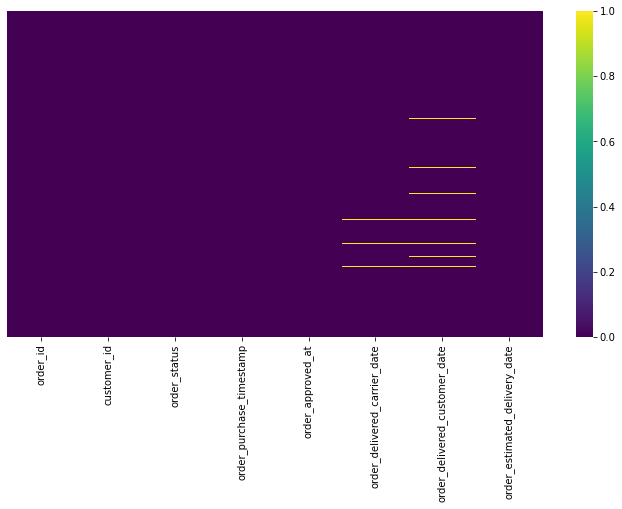

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(orders.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

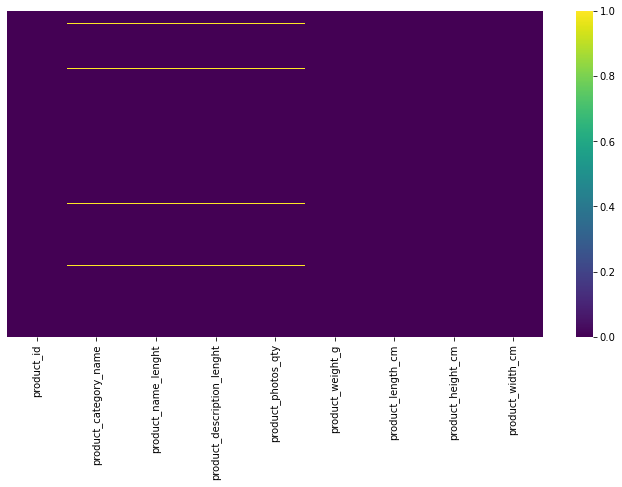

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(products.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<AxesSubplot:>

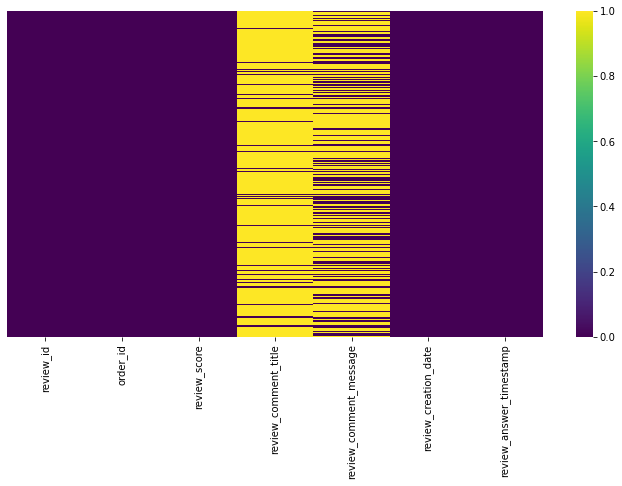

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(order_review.isnull(), yticklabels=False, cbar=True, cmap='viridis')

This code will show the number of missing values in each column of each dataframe. If there are missing values, we can decide whether to remove the rows or fill in the missing values with a mean or median.

In [9]:
orders.fillna(method= 'bfill', axis = 0).fillna(0).head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [10]:
products.fillna(method= 'bfill', axis = 0).fillna(0).tail(100)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32851,026311ea0b72ef8c80ebf91efd36b499,bebes,52.0,708.0,1.0,300.0,18.0,8.0,24.0
32852,c4ceee876c82b8328e9c293fa0e1989b,bebes,55.0,1636.0,1.0,700.0,28.0,3.0,43.0
32853,34c84b2e246f5904a5b3597b00240ea2,bebes,55.0,1636.0,1.0,600.0,20.0,13.0,13.0
32854,8d99a7ed81f061ceed740d8900be880a,cama_mesa_banho,55.0,396.0,1.0,3775.0,35.0,13.0,25.0
32855,75bc0bb91f61a5baa249e4db903eb504,ferramentas_jardim,58.0,143.0,1.0,3800.0,35.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
order_review.fillna(method= 'bfill', axis = 0).fillna(0).tail(100)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99900,92f7668f880c5774b78a928ec7e9e5a8,666cef1ea6542e749eed5394238041a2,5,entregue rapido,"I loved the pendants, they came just the way I...",22/11/2017 00:00,22/11/2017 21:22
99901,f37aef9f15a081d0790c6e76ad630160,354f62589ab0a15eb57e820d6fcbe9b5,4,entregue rapido,Very good quality product!,05/04/2017 00:00,06/04/2017 17:51
99902,41ab6a6885ad757f124eb3879402dae3,e5cefdab54d9844f44c6d68f3611f145,5,entregue rapido,Very good quality product!,12/05/2018 00:00,12/05/2018 16:59
99903,94756df369bf6a028be944d3d05c8883,e2fbbc5e799749941a23275230ee1d8b,4,entregue rapido,Very good quality product!,15/03/2018 00:00,15/03/2018 12:53
99904,14a2d3113abbac24a5b463b8d1376d8f,4d0c3a21d494b800520fb1dbaa715164,3,entregue rapido,Very good quality product!,30/08/2018 00:00,31/08/2018 21:14
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,0,"Excellent backpack, super fast delivery. I hig...",09/12/2017 00:00,11/12/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,0,"Excellent backpack, super fast delivery. I hig...",22/03/2018 00:00,23/03/2018 09:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,0,I ordered the purchase of a Celtic/Prism/Meriv...,01/07/2018 00:00,02/07/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,0,I ordered the purchase of a Celtic/Prism/Meriv...,15/12/2017 00:00,16/12/2017 01:29



Check for noise:


<AxesSubplot:xlabel='product_width_cm'>

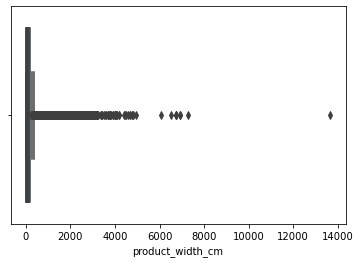

In [12]:
# Check for outliers in the order_item dataframe
sns.boxplot(x=order_items['price'])

# Check for outliers in the order_payments dataframe
sns.boxplot(x=order_payments['payment_value'])

# Check for outliers in the products dataframe
sns.boxplot(x=products['product_width_cm'])

<AxesSubplot:xlabel='product_height_cm'>

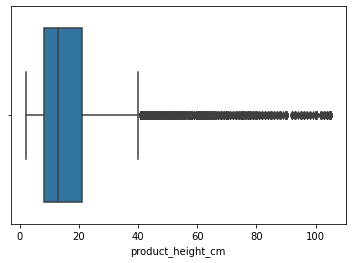

In [13]:
sns.boxplot(x=products['product_height_cm'])

<AxesSubplot:xlabel='product_length_cm'>

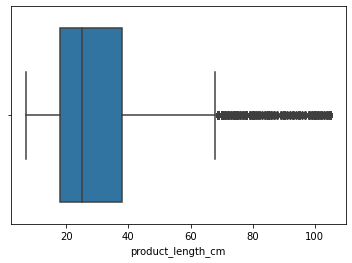

In [14]:
sns.boxplot(x=products['product_length_cm'])

<AxesSubplot:xlabel='product_weight_g'>

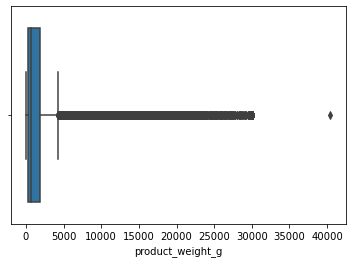

In [15]:
sns.boxplot(x=products['product_weight_g'])

This code will generate boxplots for selected columns of each dataframe, allowing us to identify any outliers or extreme values that may be considered noise. If we identify noise, we can decide whether to remove the outliers or apply some transformation to the data, such as logarithmic transformation.By checking for missing values and noise in the dataframes, we can ensure that our data is clean and reliable for further analysis.

Check for Duplicates

In [16]:
# Let's start by checking whether all customer ids are unique
## If we find duplicated customer ids we'll have to understand if there is a reason for appearing more than once in the data
customers.customer_id.nunique()

99441

In [17]:
orders.order_id.nunique()

99441

In [18]:
sellers.seller_id.nunique()

3095

In [19]:
products.product_id.nunique()

32951


Check if there's a timestamp data type that needs to be handled:


In [20]:
print(customers.dtypes)
print("-----------------------")
print(geolocation.dtypes)
print("----------------------")
print(order_items.dtypes)
print("----------------------")
print(order_payments.dtypes)
print("----------------------")
print(orders.dtypes)
print("----------------------")
print(products.dtypes)
print("----------------------")
print(sellers.dtypes)
print("----------------------")
print(product_category_name_translation.dtypes)
print("----------------------")
print(order_review.dtypes)
print("----------------------")

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
-----------------------
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
----------------------
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
----------------------
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
----------------------
order_id                         object
customer_id                      object
order_status            

convert to datetime format:

In [21]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_review['review_creation_date'] = pd.to_datetime(order_review['review_creation_date'])
order_review['review_answer_timestamp'] = pd.to_datetime(order_review['review_answer_timestamp'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

Check for categorical data:

In [22]:
print(customers.select_dtypes(include=['object'])) 
print("-----------------------------------------------------------------------")
print(geolocation.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(order_items.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(order_payments.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(orders.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(products.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(sellers.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(product_category_name_translation.select_dtypes(include=['object']))
print("-----------------------------------------------------------------------")
print(order_review.select_dtypes(include=['object']))

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

               customer_city customer_state  
0                     franca 


Check if feature scaling is needed:


In [23]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [24]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [25]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [26]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [27]:
order_review.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [28]:
orders.describe()

/var/folders/4v/p7hcg9cj6gvb6jystscwqsnc0000gn/T/ipykernel_67793/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/4v/p7hcg9cj6gvb6jystscwqsnc0000gn/T/ipykernel_67793/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
/var/folders/4v/p7hcg9cj6gvb6jystscwqsnc0000gn/T/ipykernel_67793/3333036027.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [29]:
products.describe() 

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [30]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [31]:
product_category_name_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling for numerical columns of Customer dataframe
cust_num_cols = ['customer_zip_code_prefix']
scaler = preprocessing.MinMaxScaler()
customers[cust_num_cols] = scaler.fit_transform(customers[cust_num_cols])

# Feature scaling for numerical columns of Geolocation dataframe
geo_num_cols = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
scaler = preprocessing.MinMaxScaler()
geolocation[geo_num_cols] = scaler.fit_transform(geolocation[geo_num_cols])

# Feature scaling for numerical columns of Order Items dataframe
# order_items_num_cols = ['order_item_id', 'price', 'freight_value']
# scaler = preprocessing.MinMaxScaler()
# order_items[order_items_num_cols] = scaler.fit_transform(order_items[order_items_num_cols])

# Feature scaling for numerical columns of Order Payments dataframe
# order_payments_num_cols = ['payment_sequential', 'payment_installments', 'payment_value']
# scaler = preprocessing.MinMaxScaler()
# order_payments[order_payments_num_cols] = scaler.fit_transform(order_payments[order_payments_num_cols])

# Feature scaling for numerical columns of Orders dataframe
# orders_num_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
# scaler = preprocessing.MinMaxScaler()
# orders[orders_num_cols] = scaler.fit_transform(orders[orders_num_cols])

# Feature scaling for numerical columns of Sellers dataframe
sellers_num_cols = ['seller_zip_code_prefix']
scaler = preprocessing.MinMaxScaler()
sellers[sellers_num_cols] = scaler.fit_transform(sellers[sellers_num_cols])

In [33]:
name_scaler = preprocessing.MinMaxScaler()
products["product_name_lenght"] = name_scaler.fit_transform(products[["product_name_lenght"]])

description_scaler = preprocessing.MinMaxScaler()
products["product_description_lenght"] = description_scaler.fit_transform(products[["product_description_lenght"]])

photo_scaler = preprocessing.MinMaxScaler()
products["product_photos_qty"] = photo_scaler.fit_transform(products[["product_photos_qty"]])

weight_scaler = preprocessing.MinMaxScaler()
products["product_weight_g"] = weight_scaler.fit_transform(products[["product_weight_g"]])

lenght_scaler = preprocessing.MinMaxScaler()
products["product_length_cm"] = lenght_scaler.fit_transform(products[["product_length_cm"]])

height_scaler = preprocessing.MinMaxScaler()
products["product_height_cm"] = height_scaler.fit_transform(products[["product_height_cm"]])

width_scaler = preprocessing.MinMaxScaler()
products["product_width_cm"] = width_scaler.fit_transform(products[["product_width_cm"]])


Customer Segementation


Geolocation

Plot of which state have more Customer?

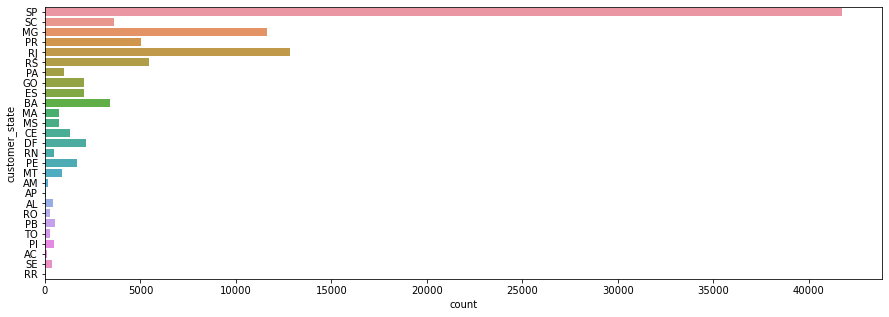

In [34]:
state = customers.groupby('customer_id')['customer_state'].sum()
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'customer_state', data = customers)
plt.show()

Products

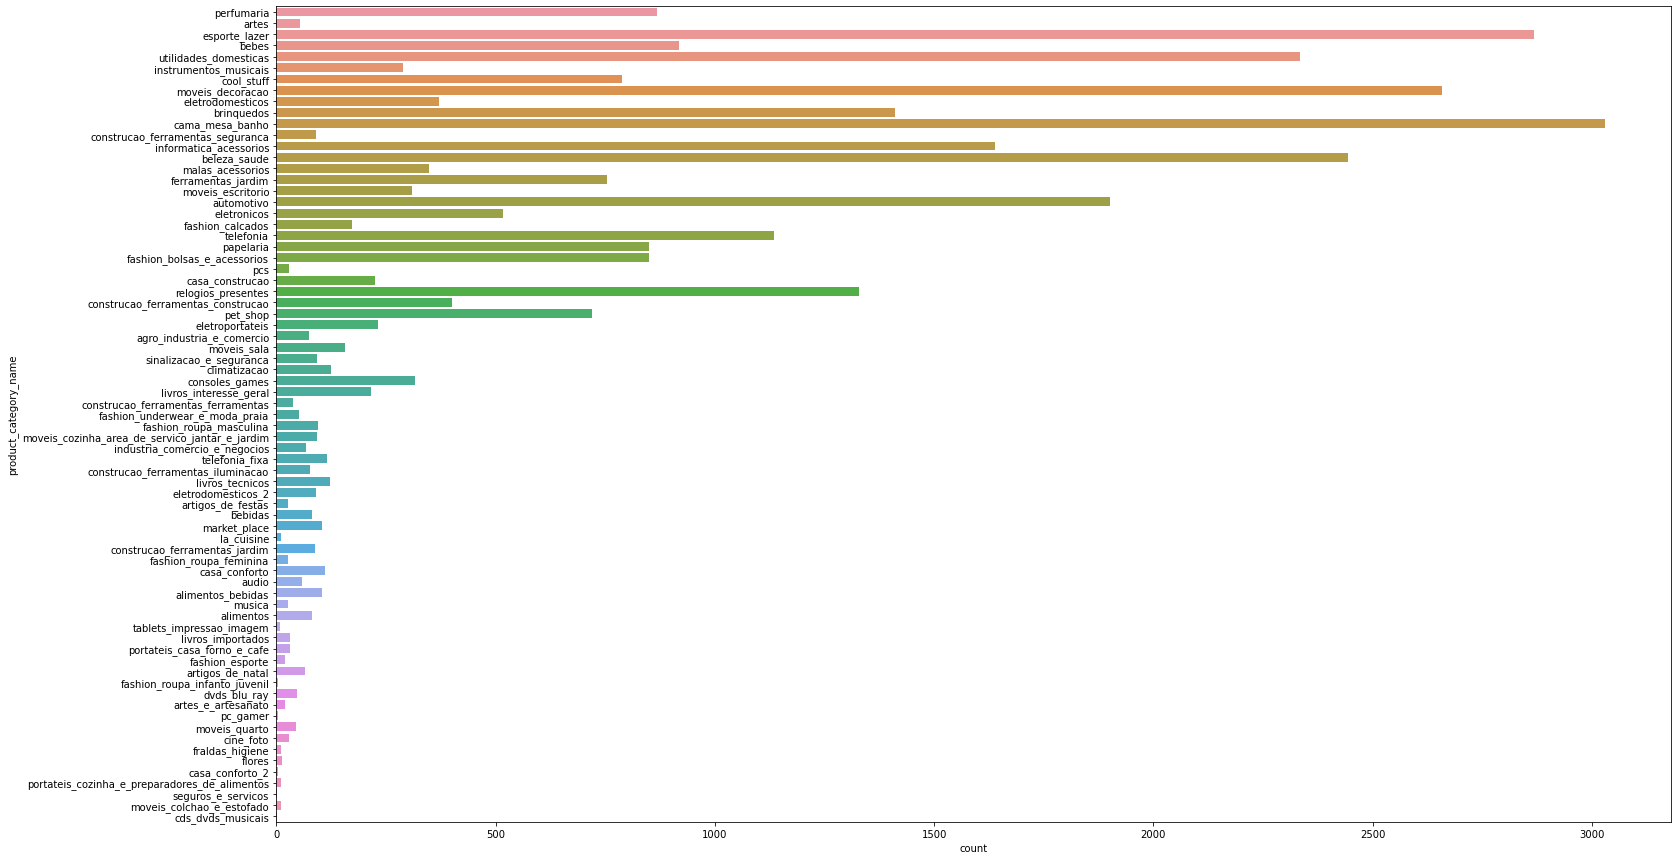

In [35]:
state = products.groupby('product_id')['product_category_name'].sum()
plt.figure(1, figsize = (25, 15))
sns.countplot(y = 'product_category_name', data = products)
plt.show()

Orders

Total Orders on E-Commerce

How many orders we have for each status?

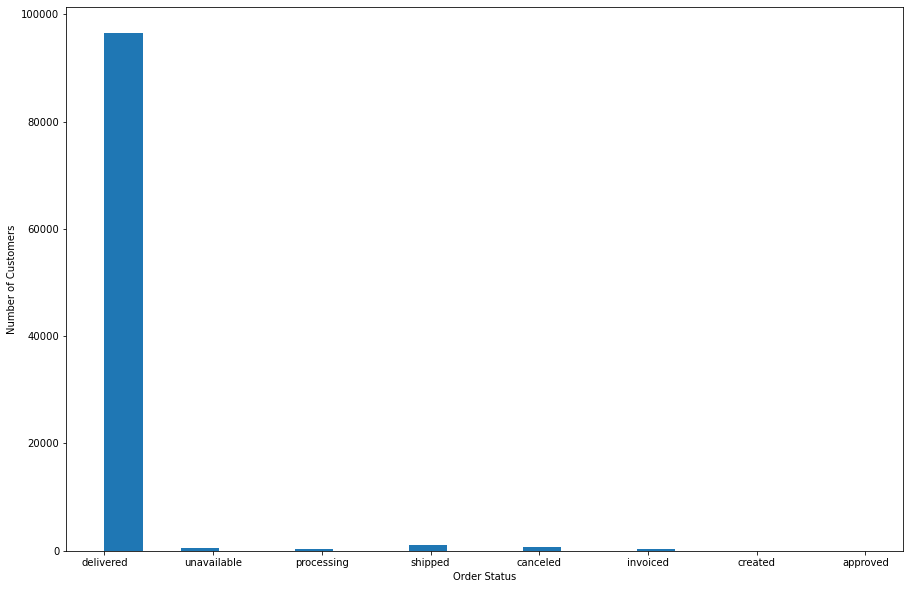

In [36]:
# Analyze order dataframe
order = orders.groupby('customer_id')['order_status'].sum()
plt.figure(1, figsize = (15, 10))
# Plot a histogram of purchase amounts
plt.hist(order, bins=20)
plt.xlabel('Order Status')
plt.ylabel('Number of Customers')
plt.show()

In [37]:
order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

Since we have more than 1 product per order, we need to sum the price and the shipping value and get the maximum value of the shipping_limit_date for analysis.

<AxesSubplot:xlabel='price', ylabel='freight_value'>

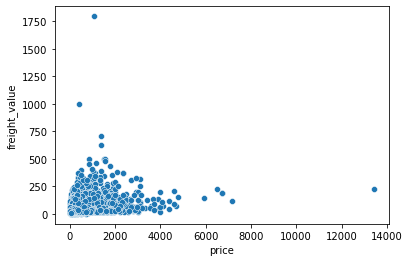

In [38]:
order_total = order_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()
sns.scatterplot(x='price',y='freight_value',data=order_total)

As you can see, we have some outliers. how come the shipping is over 500 and which order costs over 4000?

In [39]:
order_total.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [40]:
order_total

,order_id,price,freight_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,2017-02-13 13:57:51
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,2017-08-21 00:04:32


In [41]:
orders['diff_delivery_days'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).dt.days
orders.groupby(orders['diff_delivery_days'] < 0).size()
print(orders['diff_delivery_days'].describe())

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
Name: diff_delivery_days, dtype: float64


As we can see, the average difference between the estimated delivery and the actual delivery is 10 days, which is a bit high. Another fact is that an order was delivery 6 month later and other order was a high estimated date.

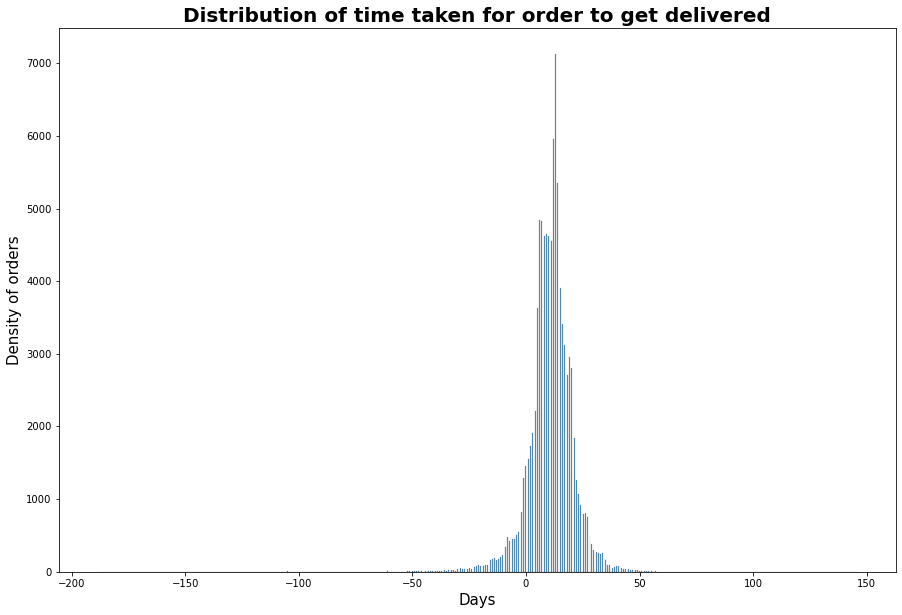

In [42]:
plt.figure(figsize=(15, 10))
sns.histplot(x='diff_delivery_days', data=orders)
plt.title('Distribution of time taken for order to get delivered',fontweight='bold',fontsize=20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

In [43]:
# Extracting attributes for purchase date - Year and Month
orders['order_purchase_year'] = orders['order_purchase_timestamp'].apply(lambda x: x.year)
orders['order_purchase_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.month)
orders['order_purchase_month_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders['order_purchase_year_month'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
orders['order_purchase_date'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
orders['order_purchase_day'] = orders['order_purchase_timestamp'].apply(lambda x: x.day)
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders['order_purchase_dayofweek_name'] = orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders['order_purchase_time_day'] = pd.cut(orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivery_days,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.0,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.0,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.0,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.0,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.0,2018,2,Feb,201802,20180213,13,1,Tue,21,Night



Is there any growing trend on e-commerce?


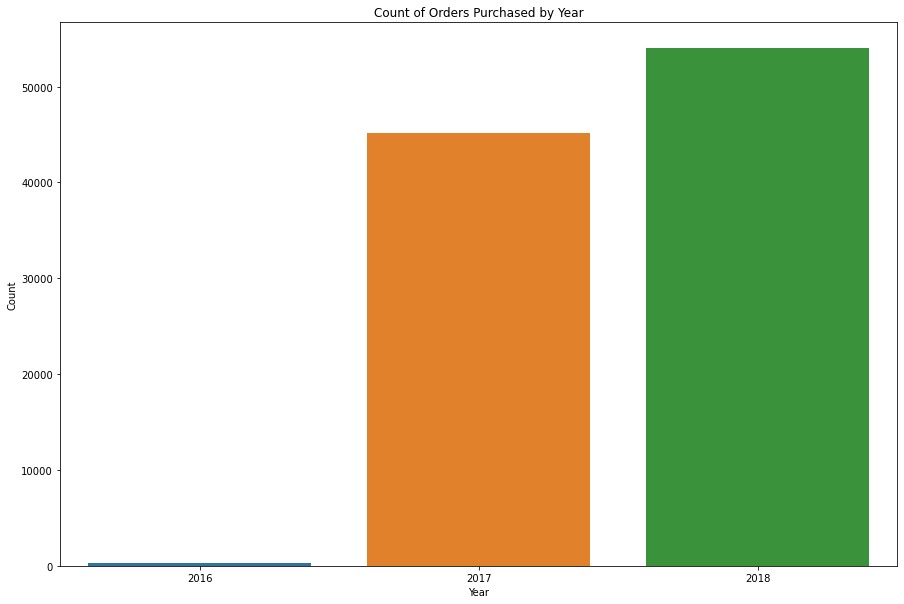

In [44]:
# get the count of orders purchased by year
orders_by_year = orders.groupby('order_purchase_year')['order_id'].count().reset_index()

# plot the count of orders purchased by year
plt.figure(figsize=(15, 10))
sns.barplot(x='order_purchase_year', y='order_id', data=orders_by_year)
plt.title('Count of Orders Purchased by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

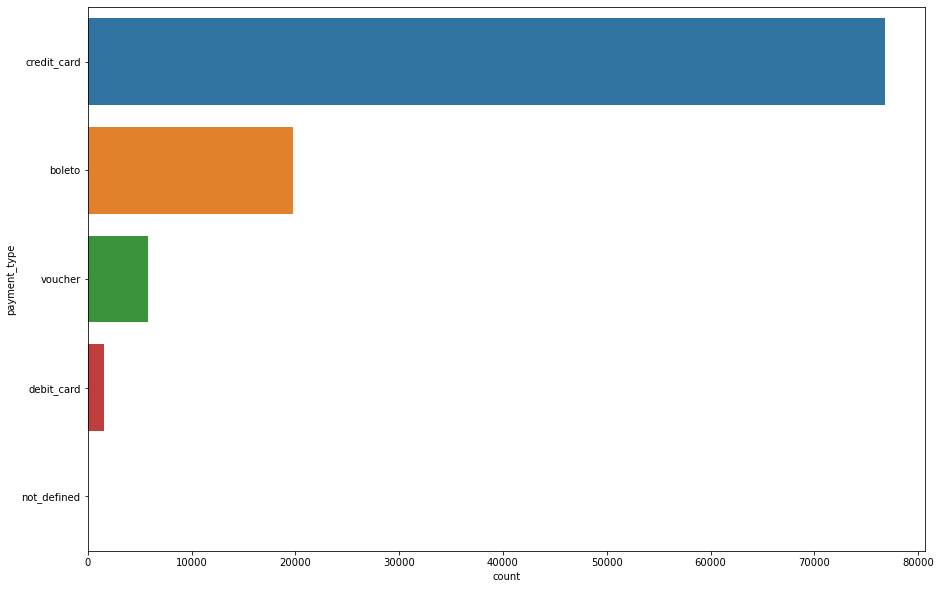

In [45]:
# Which payment type use the most?
p_type = order_payments.groupby('order_id')['payment_type'].sum()
plt.figure(1, figsize = (15, 10))
sns.countplot(y = 'payment_type', data = order_payments)
plt.show()

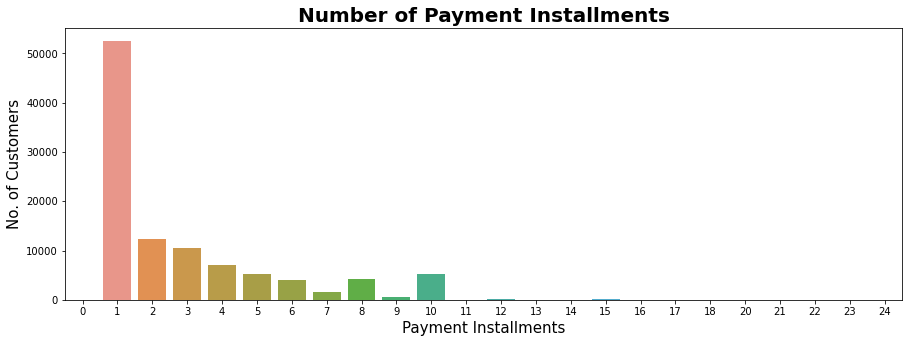

In [46]:
order_payments.payment_installments.value_counts(normalize = True)[:10] * 100
plt.figure(figsize=(15, 5))
sns.countplot(x='payment_installments',data=order_payments)
plt.title('Number of Payment Installments',fontweight='bold',fontsize=20)
plt.xlabel('Payment Installments',fontsize=15,color='black')
plt.ylabel('No. of Customers',fontsize=15,color='black')
plt.show()

In [47]:
# Calculate the total number of reviews
total_reviews = len(order_review)

# Calculate the number of positive reviews (score > 3)
positive_reviews = len(order_review[order_review['review_score'] > 3])

# Calculate the number of neutral reviews (score = 3)
neutral_reviews = len(order_review[order_review['review_score'] == 3])

# Calculate the number of negative reviews (score < 3)
negative_reviews = len(order_review[order_review['review_score'] < 3])

# Calculate the review score rate
positive_rate = positive_reviews / total_reviews
neutral_rate = neutral_reviews / total_reviews
negative_rate = negative_reviews / total_reviews

# Print the results
print("Positive Review Rate: {:.2f}%".format(positive_rate * 100))
print("Neutral Review Rate: {:.2f}%".format(neutral_rate * 100))
print("Negative Review Rate: {:.2f}%".format(negative_rate * 100))

Positive Review Rate: 76.62%
Neutral Review Rate: 8.29%
Negative Review Rate: 15.09%


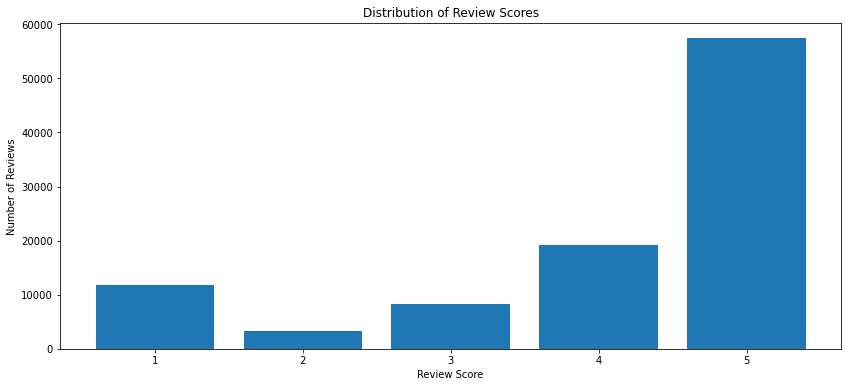

In [48]:
# Calculate the distribution of review scores
review_scores = order_review['review_score']
score_counts = review_scores.value_counts().sort_index()

# Plot the distribution of review scores
plt.figure(figsize = (14,6))
plt.bar(score_counts.index, score_counts.values)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

In [49]:
review = order_review.drop('review_comment_message',axis=1)

In [50]:
def fill_title(row):
    if row['review_score'] >4:
        val = "Super recomended"
    elif row['review_score'] >3:
        val = "Recomended"
    elif row['review_score'] >2:
        val = "Average"
    elif row['review_score'] >1:
        val = "Not good"
    else:    
        val = 'Very Bad'
    return val

In [51]:
order_review['review_comment_title'] = order_review.apply(fill_title, axis=1)

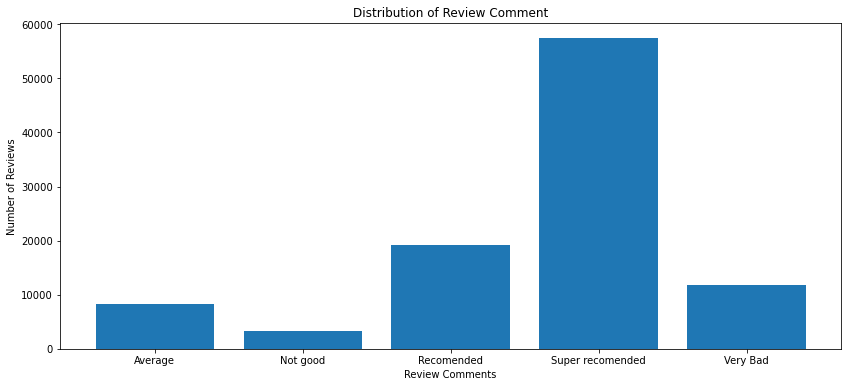

In [52]:
# Calculate the distribution of review comment
review_comment = order_review['review_comment_title']
score_counts = review_comment.value_counts().sort_index()

# Plot the distribution of review comment
plt.figure(figsize = (14,6))
plt.bar(score_counts.index, score_counts.values)
plt.title('Distribution of Review Comment')
plt.xlabel('Review Comments')
plt.ylabel('Number of Reviews')
plt.show()

RFM ANALYSIS


What is RFM analysis?

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Let’s assume we are a company, our company name is geek, let’s perform the RFM analysis on our customers

Recency: How recently has the customer made a transaction with us

Frequency: How frequent is the customer in ordering/buying some product from us

Monetary: How much does the customer spend on purchasing products from us.



In [53]:
orders_total_combins = orders.merge(order_total, on='order_id', how='inner')

In [54]:
orders_customers = customers.merge(orders_total_combins, on='customer_id', how='inner')

In [55]:
max_date = max(orders_customers['order_purchase_timestamp'])
rfm_data = orders_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum'
}).reset_index()
rfm_data.columns =['customer_id','recency','frequency','monetary']

Note that the frequency of customers is the big problem for the classification, because only 3% of customers made more than one purchase but is something that's very common in ecommerce.

0.030528191154894153
count    95420.000000
mean         1.034018
std          0.211234
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: frequency, dtype: float64


<AxesSubplot:xlabel='frequency', ylabel='Count'>

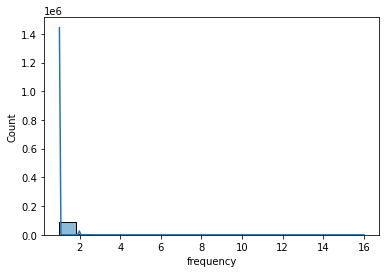

In [56]:
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])
print(rfm_data['frequency'].describe())
sns.histplot(x='frequency', data=rfm_data, kde=True)

An average monetary customer is 142  and  75 percentage of the customers spend less than 150 and the maximum was 13440.

count    95420.000000
mean       142.440198
std        217.656355
min          0.850000
25%         47.900000
50%         89.900000
75%        155.000000
max      13440.000000
Name: monetary, dtype: float64


<AxesSubplot:xlabel='monetary', ylabel='Count'>

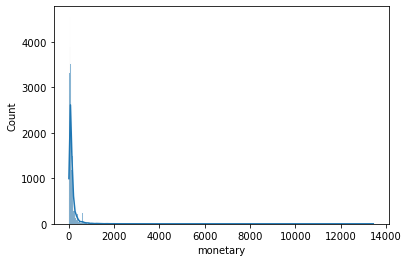

In [57]:
print(rfm_data['monetary'].describe())
sns.histplot(x='monetary', data=rfm_data, kde=True)

As we can see the 25% of customers have a recency of 3.9 months with an average of 8 months. With a purchase frequency equivalent to 1 and with this recency this indicates that customers make very specific purchases.

count    95420.000000
mean       242.600377
std        153.160320
min          0.000000
25%        118.000000
50%        223.000000
75%        352.000000
max        728.000000
Name: recency, dtype: float64


<AxesSubplot:xlabel='recency', ylabel='Count'>

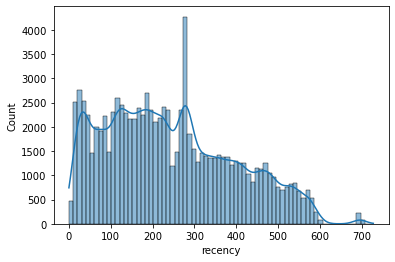

In [58]:
print(rfm_data['recency'].describe())
sns.histplot(x='recency', data=rfm_data, kde=True)